# Symbolic neural networks for cognitive capacities
[Paper](http://reason.cs.uiuc.edu/tsvi/BICA_93_Main.pdf)

## Gradient descent during recognition

In [1]:
import numpy as np

exp = np.matrix('1, 0; 1, 1') # (14)

W = np.matrix('1, -1; 0 1') # (15)

Solutions:

In [2]:
x1 = 1
x2 = 0
W * np.matrix([[x1,], [x2,]])

matrix([[1],
        [0]])

In [3]:
x1 = 1
x2 = 1
W * np.matrix([[x1,], [x2,]])

matrix([[0],
        [1]])

In [4]:
M = np.matrix('1, 0; 1, 1') # (16)

In [5]:
y1 = 0.1
y2 = 0.1
e1 = x1 / (y1 + y2) # (17)
e2 = x2 / y2 # (18)
dy1_dt = (y1 * x1) / (y1 + y2) - y1 # (19)
dy2_dt = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) - y2 # (20)
y1_new = (y1 * x1) / (y1 + y2) # (21)
y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
print("y1_new:", y1_new, "y2_new", y2_new, "# Fig 2. t=1f")

y1_new: 0.5 y2_new 0.75 # Fig 2. t=1f


In [6]:
y1 = y1_new
y2 = y2_new
y1_new = (y1 * x1) / (y1 + y2) # (21)
y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
print("y1_new:", y1_new, "y2_new", y2_new, "# Fig 2. t=2f")

y1_new: 0.4 y2_new 0.8 # Fig 2. t=2f


In [7]:
y1 = y1_new
y2 = y2_new
y1_new = (y1 * x1) / (y1 + y2) # (21)
y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
print("y1_new:", y1_new, "y2_new", y2_new, "# Fig 2. t=3f")

y1_new: 0.3333333333333333 y2_new 0.8333333333333333 # Fig 2. t=3f


In [8]:
y1 = y1_new
y2 = y2_new
y1_new = (y1 * x1) / (y1 + y2) # (21)
y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
print("y1_new:", y1_new, "y2_new", y2_new, "# Fig 2. t=4f")

y1_new: 0.28571428571428575 y2_new 0.8571428571428572 # Fig 2. t=4f


In [9]:
y1 = y1_new
y2 = y2_new
y1_new = (y1 * x1) / (y1 + y2) # (21)
y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
print("y1_new:", y1_new, "y2_new", y2_new, "# Fig 2. t=5f")

y1_new: 0.25 y2_new 0.875 # Fig 2. t=5f


In [10]:
def cycle(y1, y2):
    y1_new = (y1 * x1) / (y1 + y2) # (21)
    y2_new = (y2 / 2) * (x1 / (y1 + y2) + x2 / y2) # (22)
    return y1_new, y2_new
    
y1 = 0.1
y2 = 0.1
obs = []
for t in range(6):
    y1, y2 = cycle(y1, y2)
    obs.append( (t, y1, y2) )
for observation in obs:
    print(observation)

(0, 0.5, 0.75)
(1, 0.4, 0.8)
(2, 0.3333333333333333, 0.8333333333333333)
(3, 0.28571428571428575, 0.8571428571428572)
(4, 0.25, 0.875)
(5, 0.2222222222222222, 0.8888888888888888)


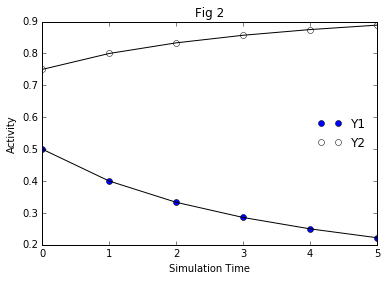

In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
t = [item[0] for item in obs]
Y1 = [item[1] for item in obs]
Y2 = [item[2] for item in obs]
line1, line1b, = plt.plot(t, Y1, 'o', t, Y1, 'k', label = 'Y1')
line2, line2b, = plt.plot(t, Y2, 'o', t, Y2, 'k', markerfacecolor='white', label = 'Y2')
plt.title('Fig 2')
plt.xlabel('Simulation Time')
plt.ylabel('Activity')
plt.legend([line1, line2], ['Y1', 'Y2'], loc=5, frameon=False)
plt.show()

Steps to 0.99: 98


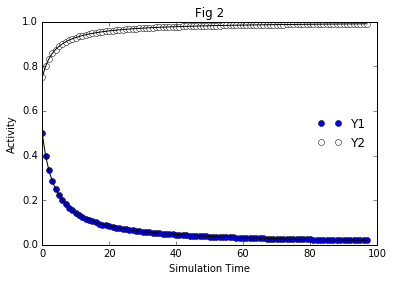

In [12]:
y1 = 0.1
y2 = 0.1
t = 0
obs = []
max_y = 0
while max_y < 0.99:
    y1, y2 = cycle(y1, y2)
    obs.append( (t, y1, y2) )
    t += 1
    max_y = max(y1, y2)
print("Steps to 0.99:", len(obs))
t = [item[0] for item in obs]
Y1 = [item[1] for item in obs]
Y2 = [item[2] for item in obs]
line1, line1b, = plt.plot(t, Y1, 'o', t, Y1, 'k', label = 'Y1')
line2, line2b, = plt.plot(t, Y2, 'o', t, Y2, 'k', markerfacecolor='white', label = 'Y2')
plt.title('Fig 2')
plt.xlabel('Simulation Time')
plt.ylabel('Activity')
plt.legend([line1, line2], ['Y1', 'Y2'], loc=5, frameon=False)
plt.show()

## Example of a more complex symbolic recognition and recall

In [13]:
exp = np.matrix('2, 1, 1, 1; 1, 0, 0, 1') # wheels, horizontal lines, handlebars, seat (25)
print(exp)

y1 = np.matrix('1; 0')
print(y1)
y2 = np.matrix('0; 1')
print(y2)

[[2 1 1 1]
 [1 0 0 1]]
[[1]
 [0]]
[[0]
 [1]]


In [14]:
bicycle = np.matrix('2; 1; 1; 1')
print(bicycle)
unicycle = np.matrix('1; 0; 0; 1')
print(unicycle)

[[2]
 [1]
 [1]
 [1]]
[[1]
 [0]
 [0]
 [1]]


In [15]:
pinv = np.linalg.pinv(exp)
prediction_bicycle =  pinv.transpose() * bicycle
prediction_bicycle.round(2)

array([[ 1.],
       [-0.]])

In [16]:
bicycle_no_horizontal = np.matrix('2; 0; 1; 1')
prediction_bicycle_no_horizontal =  pinv.transpose() * bicycle_no_horizontal
prediction_bicycle_no_horizontal

matrix([[ 0.6],
        [ 0.6]])

Composite expectation (OR)

In [17]:
bicycle_or_unicycle = np.matrix('3; 1; 1; 2')
prediction_bicycle_or_unicycle =  pinv.transpose() * bicycle_or_unicycle
prediction_bicycle_or_unicycle

matrix([[ 1.],
        [ 1.]])

How many wheels on a bicycle?

In [18]:
bicycle = 0
wheels = 0
exp.item((bicycle, wheels))

2

In [19]:
unicycle = 1
wheels = 0
exp.item((unicycle, wheels))

1

## Learning example

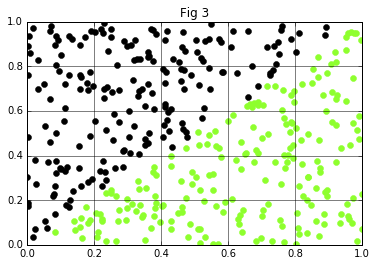

In [20]:
x = np.random.uniform(0, 1, 400)
y = np.random.uniform(0, 1, 400)
points = [item for item in zip(x,y)]
black_x = []
black_y = []
green_x = []
green_y = []
for point in points:
    if point[1] > point[0]:
        black_y.append(point[1])
        black_x.append(point[0])
    else:
        green_y.append(point[1])
        green_x.append(point[0])
        

fig, ax = plt.subplots()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-')
ax.grid(True)
ax.plot(black_x, black_y, 'ko')
ax.plot(green_x, green_y, 'o', markeredgecolor = "#8EFF2E", markerfacecolor = "#8EFF2E")
plt.title('Fig 3')
plt.show()

In [21]:
black_x1 = np.mean(black_x)
black_x2 = np.mean(black_y)
green_x1 = np.mean(green_x)
green_x2 = np.mean(green_y)
M = np.matrix([[black_x1, black_x2], [green_x1, green_x2]]) # (27)
M.round(2)

array([[ 0.32,  0.66],
       [ 0.64,  0.33]])

In [22]:
pinv = np.linalg.pinv(M)
pinv_transpose = pinv.transpose()
green = np.matrix('0.8; 0.2')
prediction_green =  pinv_transpose * green
prediction_green

matrix([[-0.42391085],
        [ 1.44949114]])

In [23]:
black = np.matrix('0.2; 0.8')
prediction_black =  pinv_transpose * black
prediction_black

matrix([[ 1.39336799],
        [-0.37511906]])

In [24]:
black_tally = 0
for index, _ in enumerate(black_x):
    black = np.matrix([black_x[index], black_y[index]]).transpose()
    prediction_black = pinv_transpose * black
    if prediction_black.item( (0, 0) ) > prediction_black.item( (1, 0) ):
        black_tally += 1
    else:
        print(prediction_black)
print("black {}/{}".format(black_tally, len(black_x)))

[[ 0.42862665]
 [ 0.4580771 ]]
[[ 0.64879819]
 [ 0.7020367 ]]
[[ 0.47834924]
 [ 0.50479123]]
black 188/191


In [25]:
green_tally = 0
for index, _ in enumerate(green_x):
    green = np.matrix([green_x[index], green_y[index]]).transpose()
    prediction_green = pinv_transpose * green
    if prediction_green.item( (0, 0) ) < prediction_green.item( (1, 0) ):
        green_tally += 1
    else:
        print(prediction_green)
print("green {}/{}".format(green_tally, len(green_x)))

green 209/209
